In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

In [93]:
house=pd.read_csv("IndianHouses.csv")
df=house.copy()


In [94]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [95]:
df = house.copy()

# Feature Engineering - Créez de nouvelles fonctionnalités
df['TotalArea'] = df['Area'] * df['BHK']
df['RoomsPerBathroom'] = df['BHK'] / df['Bathroom']

# Gestion des données manquantes - Imputez les valeurs manquantes
df.dropna(axis=0,inplace=True)

# Élimination des valeurs aberrantes
df = df[(df['TotalArea'] < 5000) & (df['Price'] < 3e7)]

# Sélection de caractéristiques - Choisissez les caractéristiques les plus importantes
selected_features = ['TotalArea', 'RoomsPerBathroom', 'BHK', 'Parking']
X = df[selected_features]
y = df['Price']

# Données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Transformation polynomiale des caractéristiques
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Normalisation des caractéristiques
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_poly, y_train)


# Prédiction sur les données de test
y_pred = model.predict(X_test_poly)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print(model.score(X_test_poly,y_test))

Root Mean Squared Error: 5930187.712049238
0.17613477191771176


In [96]:
df.shape

(691, 13)

In [97]:
pd.set_option("display.max_columns",11)
pd.set_option("display.max_rows",1259)
   

In [98]:
df['Locality'] = df['Locality'].str.split(' ').str[1]

In [99]:
df.drop(["Locality"],axis=1,inplace=True)

In [100]:
df.head()

,Area,BHK,Bathroom,Furnishing,Parking,...,Transaction,Type,Per_Sqft,TotalArea,RoomsPerBathroom
1,750.0,2,2.0,Semi-Furnished,1.0,...,New_Property,Apartment,6667.0,1500.0,1.0
2,950.0,2,2.0,Furnished,1.0,...,Resale,Apartment,6667.0,1900.0,1.0
3,600.0,2,2.0,Semi-Furnished,1.0,...,Resale,Builder_Floor,6667.0,1200.0,1.0
4,650.0,2,2.0,Semi-Furnished,1.0,...,New_Property,Builder_Floor,6667.0,1300.0,1.0
7,650.0,2,2.0,Semi-Furnished,1.0,...,New_Property,Apartment,6154.0,1300.0,1.0


In [101]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft,TotalArea,RoomsPerBathroom
count,691.000000,691.000000,691.000000,691.000000,6.910000e+02,691.000000,691.000000,691.000000
mean,910.510774,2.360347,2.044863,1.662808,1.007009e+07,12327.587554,2291.488886,1.206151
std,414.118144,0.735511,0.674171,3.837729,7.504279e+06,14276.335089,1346.309488,0.387351
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1667.000000,50.000000,0.500000
25%,600.000000,2.000000,2.000000,1.000000,3.800000e+06,5791.500000,1200.000000,1.000000
50%,900.000000,2.000000,2.000000,1.000000,7.000000e+06,8701.000000,2139.000000,1.000000
75%,1200.000000,3.000000,2.000000,1.000000,1.550000e+07,14816.500000,3300.000000,1.500000
max,4900.000000,6.000000,6.000000,39.000000,2.950000e+07,183333.000000,4950.000000,4.000000


In [102]:
df.dtypes.value_counts()

float64    6
object     4
int64      2
Name: count, dtype: int64

<Axes: ylabel='count'>

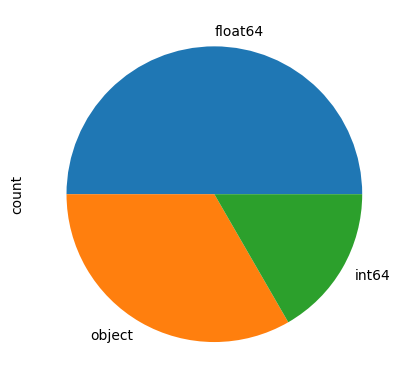

In [103]:
df.dtypes.value_counts().plot.pie()

In [104]:
 
missing_values=df.isna().sum()/df.shape[0]
missing_values.sort_values(ascending=True)

Area                0.0
BHK                 0.0
Bathroom            0.0
Furnishing          0.0
Parking             0.0
Price               0.0
Status              0.0
Transaction         0.0
Type                0.0
Per_Sqft            0.0
TotalArea           0.0
RoomsPerBathroom    0.0
dtype: float64

In [105]:
df.dropna(axis=0).shape


(691, 12)

In [106]:
a=np.array(df["Furnishing"]).reshape(df["Furnishing"].shape[0],1)
a.shape

(691, 1)

In [107]:
from sklearn.preprocessing import OneHotEncoder
numerical_columns=[]
object_columns=[]
for col in df.columns:
   
    print(col,'-------->',df[col].unique().size,"  type=",df[col].dtypes)
    """ if (df[col].unique().size <=4) and df[col].dtypes=="object":
        
        preprocessor=OneHotEncoder(sparse=False)
        preprocessor.fit_transform(col)"""
        
    if df[col].dtypes != "object" and col!= "Price":
        numerical_columns.append(col)
    elif col!="Price":
        object_columns.append(col)

    

Area --------> 180   type= float64
BHK --------> 6   type= int64
Bathroom --------> 6   type= float64
Furnishing --------> 3   type= object
Parking --------> 7   type= float64
Price --------> 171   type= int64
Status --------> 2   type= object
Transaction --------> 2   type= object
Type --------> 2   type= object
Per_Sqft --------> 191   type= float64
TotalArea --------> 219   type= float64
RoomsPerBathroom --------> 11   type= float64


In [108]:
"""categorical_columns = df.select_dtypes(include=['object'])
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
encoded_data=encoder.fit_transform(categorical_columns)"""

"categorical_columns = df.select_dtypes(include=['object'])\nfrom sklearn.preprocessing import OneHotEncoder\nencoder=OneHotEncoder(sparse=False)\nencoded_data=encoder.fit_transform(categorical_columns)"

In [109]:
"""df_encoded=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(categorical_columns.columns))"""

'df_encoded=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(categorical_columns.columns))'

In [110]:
"""df.drop(categorical_columns,axis=1,inplace=True)
df=pd.concat([df,df_encoded],axis=1)"""

'df.drop(categorical_columns,axis=1,inplace=True)\ndf=pd.concat([df,df_encoded],axis=1)'

In [111]:
"""df_encoded.head()"""

'df_encoded.head()'

In [112]:
"""df.head()"""

'df.head()'

In [113]:
print(numerical_columns)
print(object_columns)

['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft', 'TotalArea', 'RoomsPerBathroom']
['Furnishing', 'Status', 'Transaction', 'Type']


In [114]:

#sns.pairplot(df,hue="Price")

In [115]:
"""print(numerical_columns)
print(object_columns)"""

'print(numerical_columns)\nprint(object_columns)'

In [116]:
X=df.drop(["Price"],axis=1)
y=df["Price"]

In [117]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

In [118]:
numerical_pipeline=make_pipeline(SimpleImputer(),StandardScaler(),) #polinomialfeature
object_pipeline=make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(sparse=False),StandardScaler(with_mean=False)) 


In [119]:
preprocessor=make_column_transformer((numerical_pipeline,numerical_columns),(object_pipeline,object_columns))


In [120]:
a=preprocessor.fit_transform(X)


C:\Users\fred\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [121]:
encoded_data=pd.DataFrame(a,columns=preprocessor.get_feature_names_out(X.columns))

In [122]:
df.drop(X.columns,axis=1,inplace=True)



In [123]:
df=pd.concat([df,encoded_data],axis=1)

<Axes: >

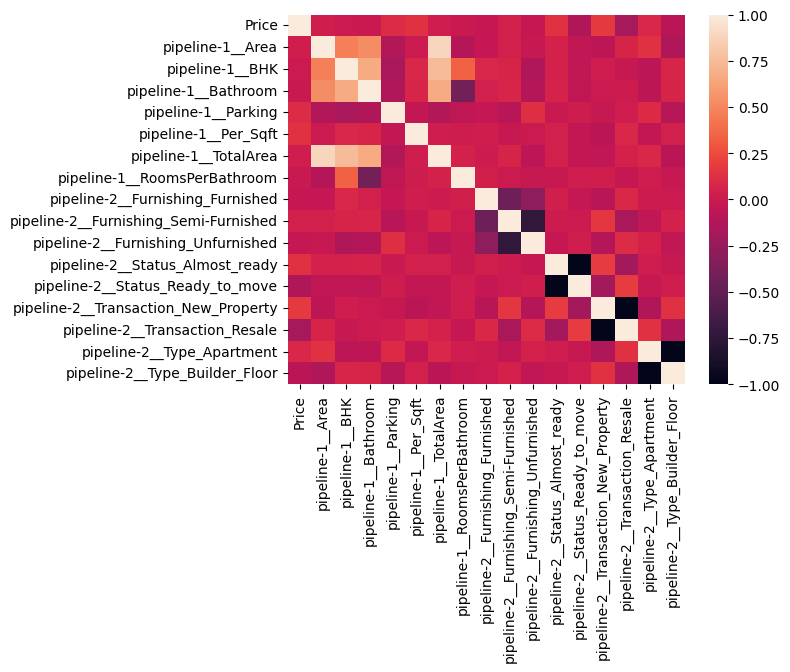

In [124]:
sns.heatmap(df.corr())

In [125]:
# Suppression des variables peu corrélées avec la variable cible
corr_threshold = 0.20
corr_with_target = df.corr()["Price"].abs()
columns_to_keep = corr_with_target[corr_with_target >= corr_threshold].index
print(columns_to_keep)
df = df[columns_to_keep]



Index(['Price'], dtype='object')


In [126]:
X=df.drop(["Price"],axis=1)
y=df["Price"]


In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [128]:
from sklearn.linear_model import LinearRegression

model=LinearRegression( )

In [129]:
model.fit(X_train,y_train)

ValueError: at least one array or dtype is required

In [ ]:
model.score(X_test,y_test)

0.5747221796933344